# Analyzing Twitter Sentiment


Have you ever wondered how well a convention faired amongst the public? Well here in this notebook, we will go over real tweets that were sent out during and pertaining to the 2012 South by Southwest Festival. We will look into how people felt about the event as to gain insights on how the companies that took part can improve in the future.

In [592]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import plot_tree
from sklearn import tree
from six import StringIO
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
#import spacy

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [593]:
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

In [594]:
#import spacy

In [595]:
#!pip install pyLDAvis

#import gensim
#import gensim.corpora as corpora

#import pyLDAvis
#import pyLDAvis.gensim_models

#pyLDAvis.enable_notebook()

In [596]:
#have already downloaded spacy; only need to run it once
#!python -m spacy download en_core_web_md 

In [597]:
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding= 'unicode_escape')
data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [598]:
#renaming columns
data = data.rename(columns = {'tweet_text': 'Tweet_Text', 'emotion_in_tweet_is_directed_at': 'Subject that Tweet is Directed At', 'is_there_an_emotion_directed_at_a_brand_or_product': 'Emotion_of_Tweet'}, inplace = False)

In [599]:
#dropping Subject that Tweet is Directed at since over half the entries are empty
data.drop(axis=1, columns='Subject that Tweet is Directed At', inplace=True)
data

,Tweet_Text,Emotion_of_Tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


In [600]:
#dropping the one row that has missing values
data.dropna(inplace=True)

In [601]:
#dealing with just the positive and negative tweets
posdata = data[data['Emotion_of_Tweet'] == 'Positive emotion']
negdata = data[data['Emotion_of_Tweet'] == 'Negative emotion']

emodata  = pd.concat([posdata,negdata])
emodata

,Tweet_Text,Emotion_of_Tweet
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,Positive emotion
...,...,...
8973,Google guy at #sxsw talk is explaining how he ...,Negative emotion
8981,I think my effing hubby is in line for an #iPa...,Negative emotion
9008,I'm pretty sure the panelist that thinks &quot...,Negative emotion
9043,Hey is anyone doing #sxsw signing up for the g...,Negative emotion


# Exploring Our Data

In [602]:
#looking at counts for the different emotions
data.Emotion_of_Tweet.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion_of_Tweet, dtype: int64

In [603]:
#most frequent words for positive and negative
posdata = data[data['Emotion_of_Tweet'] == 'Positive emotion']
negdata = data[data['Emotion_of_Tweet'] == 'Negative emotion']

data_positive = posdata['Tweet_Text']
data_negative = negdata['Tweet_Text']

#concatting the positive and negative emotions for later
emotweet = pd.concat([data_positive,data_negative])

#splitting the different emotions into seperate lists
pos_tweets = [d.split() for d in data_positive.to_list()]
neg_tweets = [d.split() for d in data_negative.to_list()]

In [604]:
#positive word count
pos_words = set()
for count in pos_tweets:
    pos_words.update([c.lower() for c in count])
len(pos_words)

7916

In [605]:
#negative word count
neg_words = set()
for count in neg_tweets:
    neg_words.update([c.lower() for c in count])
len(neg_words)

2846

In [606]:
#setting up stop words here
sw_list  = stopwords.words('english')
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '.', ',']
sw_list += ['-', '–', '—','rt', 'i', '2', 'the', 'get', '{link}rt', 'mention',"i'm", '#sxsw.']
sw_list += ['the','&amp;','I','rt','{link}','@mention','amp', 'sxsw', '@sxswrt', '#sxswrt']
sw_list += list(string.punctuation)

sw_set = set(sw_list)

In [607]:
#cleaning with stop words then adding into seperate lists by emotion
cleaned_pos = [item.lower() for sublist in pos_tweets for item in sublist if item not in sw_list]
cleaned_neg = [item.lower() for sublist in neg_tweets for item in sublist if item not in sw_list]

#checking frequency of each emotion list
pos_freq = FreqDist(cleaned_pos)
neg_freq = FreqDist(cleaned_neg)

In [608]:
#checking what's the most frequent words in positive tweets
pos_freq.most_common(10)

[('#sxsw', 2506),
 ('rt', 911),
 ('ipad', 793),
 ('apple', 624),
 ('google', 517),
 ('store', 448),
 ('iphone', 358),
 ('new', 357),
 ('app', 313),
 ('austin', 205)]

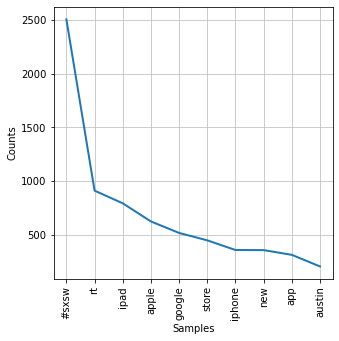

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [609]:
#plotting the positive frequencies
plt.figure(figsize=(5,5))
pos_freq.plot(10)

In [610]:
#checking what's the most frequent words in negative tweets
neg_freq.most_common(10)

[('#sxsw', 512),
 ('ipad', 140),
 ('rt', 137),
 ('google', 120),
 ('iphone', 110),
 ('apple', 78),
 ('app', 43),
 ('new', 42),
 ('like', 37),
 ('store', 35)]

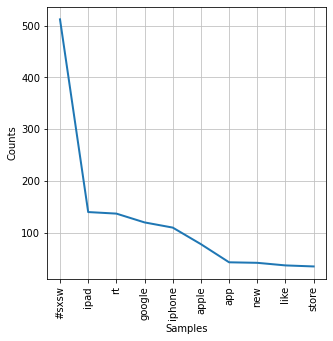

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [611]:
#plotting the negative frequencies
plt.figure(figsize=(5,5))
neg_freq.plot(10)

In regards to the most frequent words for both the positive and negative tweets, there seems to be a few that are present in both categories. This can make it hard to tell exactly how the event is leaning for the emotional spectrum so next we'll do some steps that will hopefully allow us to gain more insight.

The next step in particular is normalizing our most frequent words, which will equalize them so that the length of the tweets don't interfere with the accuracy of how they are compared to one another.

In [612]:
pos_total_wc = sum(pos_freq.values())
pos_top_10 = pos_freq.most_common(10)
print("Word \t\t Positive Normalized Frequency")
print()
for word in pos_top_10:
    posnorm_freq = word[1]/pos_total_wc
    print("{} \t\t {:.4}".format(word[0], posnorm_freq))

Word 		 Positive Normalized Frequency

#sxsw 		 0.07143
rt 		 0.02597
ipad 		 0.0226
apple 		 0.01779
google 		 0.01474
store 		 0.01277
iphone 		 0.0102
new 		 0.01018
app 		 0.008922
austin 		 0.005844


In [613]:
neg_total_wc = sum(neg_freq.values())
neg_top_10 = neg_freq.most_common(10)
print("Word \t\t Negative Normalized Frequency")
print()
for word in neg_top_10:
    negnorm_freq = word[1]/neg_total_wc
    print("{} \t\t {:.4}".format(word[0], negnorm_freq))

Word 		 Negative Normalized Frequency

#sxsw 		 0.07427
ipad 		 0.02031
rt 		 0.01987
google 		 0.01741
iphone 		 0.01596
apple 		 0.01131
app 		 0.006237
new 		 0.006092
like 		 0.005367
store 		 0.005077


In [614]:
#changing the most frequent counts to dataframes to use later
pos_10 = pd.DataFrame(pos_top_10)
neg_10 = pd.DataFrame(neg_top_10)

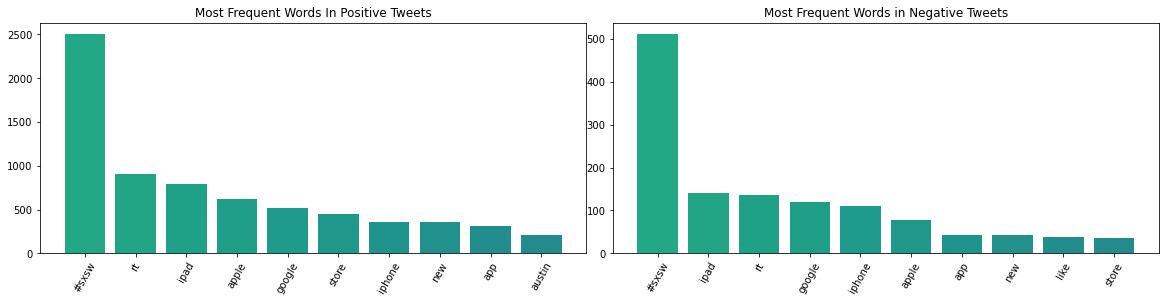

In [615]:
#graphing our most frequent words
pos_bar_counts = [x[1] for x in pos_freq.most_common(10)]
pos_bar_words  = [x[0] for x in pos_freq.most_common(10)]

neg_bar_counts = [x[1] for x in neg_freq.most_common(10)]
neg_bar_words  = [x[0] for x in neg_freq.most_common(10)]

color = cm.viridis_r(np.linspace(.4,.8,30))

new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax.bar(pos_bar_words, pos_bar_counts, color=color)
ax2.bar(neg_bar_words, neg_bar_counts, color=color)

ax.title.set_text("Most Frequent Words In Positive Tweets")
ax2.title.set_text("Most Frequent Words in Negative Tweets")

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)
    
plt.tight_layout(pad=0)

plt.show()

Here is a good instance in how the normalized frequencies show us a more accurate picture. Although there are the same words in both lists and graphs, we can now see how much they occur in positive/negative tweets. For instance, the word 'apple' appears more in positive tweets numerically (2% positive versus 1% negative) and the word 'google' is seen in higher quantities amongst the negative tweets. Admittedly, there percentages are not by much but this does allow us a closer look into how the companies were received during the convention more so than what a normal bar graph could do.

# Transforming Our Data

Now that we have taken steps to clean and explore our data, we can now make a model that will allow companies in the future to rate the sentiment of real tweets about their companies and products.

First thing  we'll do in to make building our model easier is lemmatization. Lemmatizing the data will ensure that the words we are returning in our model are actual words as well as cutting down plural forms to singular so as to help reduce the repetition.

In [616]:
x = emodata['Tweet_Text']
y = emodata['Emotion_of_Tweet']

In [617]:
#lemmatizing the data
dataset = emodata['Tweet_Text']
target = emodata['Emotion_of_Tweet']

processed_data = [d.split() for d in dataset.to_list()]

lemmatizer = WordNetLemmatizer()
lemmatized_output = []

for lists in processed_data:
    changedlem = ' '.join([lemmatizer.lemmatize(w) for w in lists])
    lemmatized_output.append(changedlem)

In [618]:
x_lem = lemmatized_output
y_lem = target

Next is TF-IDF (or otherwise known as term frequency - inverse document frequency), which help us show how relevant a word is to the tweet. For instance, we have already done the frequencies of the words for both emotions, but TF-IDF will allow us to look at words that are more unique but still contribute significantly to the over all feel of the message. This will allow us to see which words may be more important and help fine tune which are problematic/exceptional.

In [619]:
#now using TF-IDF with lemmatized data
x_train_lem, x_test_lem, y_train_lem, y_test_lem = train_test_split(x_lem, y_lem, test_size=0.20, random_state=1)

tfidf = TfidfVectorizer(stop_words=sw_set)

tfidf_data_train_lem = tfidf.fit_transform(x_train_lem)
tfidf_data_test_lem  = tfidf.transform(x_test_lem)

tfidf_data_train_lem

<2838x5198 sparse matrix of type '<class 'numpy.float64'>'
	with 27902 stored elements in Compressed Sparse Row format>

In [620]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 9.831571529245949
Percentage of columns containing ZERO: 0.9981085857004144


After using the lemmatized data with TF-IDF, we can see with the sparse matrix that we now have 2,838 rows of text with 5,198 columns (or words in this case). In addition, we have the next output which tells us that the average word length of each tweet is only on average about nine to ten words long. There is also the fact that 99% of columns contain zero means that there are a lot of unique words throughout the tweets.

This could tell us that the tweets in this particular dataset are not very long, but are very distinctive from one another. We could infer that the people that are tweeting are just putting their first thoughts out and are not looking into event too closely. Or this could mean that people are not wanting to go into great detail about the event. It is hard to say for sure at this moment, but it should be mentioned that Twitter does have a limitation on how long a tweet can be so that should also be taken into account. We'll continue to transform our data so that we can get a more accurate picture.

In [ ]:
#Using Spacy to transform the data to see if that changes our modeling results

nlp = spacy.load('en_core_web_md')
data['spacy'] = data.Tweet_Text.apply(lambda x: nlp(x))

spacy_tweet = pd.DataFrame(np.vstack([x.vector for x in data.spacy]))
spacey_emotion = data.Emotion_of_Tweet

spacey_emotion.loc[(spacey_emotion == "Negative emotion")] = -1
spacey_emotion.loc[(spacey_emotion == "No emotion toward brand or product")] = 0
spacey_emotion.loc[(spacey_emotion == "I can't tell")] = 0
spacey_emotion.loc[(spacey_emotion == "Positive emotion")] =  1

spacey_emotion = spacey_emotion.astype(int)

#Train-Test-Split
x_spacy_train, x_spacy_test, y_spacy_train, y_spacy_test = train_test_split(spacy_tweet, spacey_emotion, test_size=0.20, random_state=1)

In the code above, we've implemented Spacy onto our raw dataset so that we can compare it to our lemmatized and TF-IDF dataset. We will put both sets into our models below and this will show us if our cleaning of the code manually is the better/more efficient way or if perhaps the Spacy library is. What Spacy does for us is tokenizes our tweet text data as well as offers other additional features to understand large volumes of text. Next step, modeling!

# Modeling Our Data

In [ ]:
#try random forest model first
ranfor_lem = RandomForestClassifier(n_estimators=100, random_state=0)

ranfor_lem.fit(tfidf_data_train_lem, y_train_lem)

ranfor_train_preds_lem = ranfor_lem.predict(tfidf_data_train_lem)
ranfor_test_preds_lem = ranfor_lem.predict(tfidf_data_test_lem)

print('Classification Report: Train Set \n')
print(classification_report(y_train_lem, ranfor_train_preds_lem))
print('Classification Report: Test Set \n')
print(classification_report(y_test_lem, ranfor_test_preds_lem))

#confusion matrices
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8))
                               
plot_confusion_matrix(ranfor_lem, tfidf_data_train_lem, y_train_lem, ax=ax0)
plot_confusion_matrix(ranfor_lem, tfidf_data_test_lem, y_test_lem, ax=ax1)

ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

plt.show()

The model we tried first was Random Forest since it has the feature importance attribute, which will be a big help in indicating exactly what companies need to pay attention to. 

Here with this model, we ran our manually edited dataset with it and the results weren't perfect, but not bad. We can see across accuracy, precision, recall and f-1 scores that this model had some hiccups, but wasn't too unreliable in predicting whether a tweet was negative or positive. We will keep this in mind when going through our next set of models.

In [ ]:
#now random forest with spacy

ranfor_spacy = RandomForestClassifier(n_estimators=100, random_state=0)

ranfor_spacy.fit(x_spacy_train, y_spacy_train)

ranfor_train_preds_spacy = ranfor_spacy.predict(x_spacy_train)
ranfor_test_preds_spacy = ranfor_spacy.predict(x_spacy_test)

print('Classification Report: Train Set \n')
print(classification_report(y_spacy_train, ranfor_train_preds_spacy))
print('Classification Report: Test Set \n')
print(classification_report(y_spacy_test, ranfor_test_preds_spacy))

#confusion matrices
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8))
                               
plot_confusion_matrix(ranfor_spacy, x_spacy_train, y_spacy_train, ax=ax0)
plot_confusion_matrix(ranfor_spacy, x_spacy_test, y_spacy_test, ax=ax1)

ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

plt.show()

This next Random Forest model was run with the Spacy dataset with less favorable results than the first. However, it's worth noting that this model has run with all of our data, including the neutral tweets that were not part of the manually sorted data created earlier. So if were are to use this model with this particular data, it is perhaps a better model for companies who are interested in the full spectrum of emotion, including apathy.

In [ ]:
#now gnb to see if it does any better
#first without Spacy data

gnb = GaussianNB()

train = tfidf_data_train_lem.toarray()
test  = tfidf_data_test_lem.toarray()

gnb.fit(train, y_train_lem)

gnb_train_preds_lem = gnb.predict(train)
gnb_test_preds_lem  = gnb.predict(test)

print('Classification Report: Train Set \n')
print(classification_report(y_train_lem, gnb_train_preds_lem))
print('Classification Report: Test Set \n')
print(classification_report(y_test_lem, gnb_test_preds_lem))


#confusion matrices
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8))
                               
plot_confusion_matrix(gnb, train, y_train_lem, ax=ax0)
plot_confusion_matrix(gnb, test, y_test_lem, ax=ax1)

ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

plt.show()

Our next model is the Gaussian Naive Bayes, or gnb for short, which typically do well with classifications. Here with our specially assembled dataset, we can see that so far the Random Forest model is having better luck across the board. There are lower accuracy, precision, recall and f-1 scores in comparison but this is still a good model to try since gnb models are suited for multiple class predictions. 

In [ ]:
#now with Spacy data

gnb_spacy = GaussianNB()

gnb_spacy.fit(x_spacy_train, y_spacy_train)

gnb_train_preds_spacy = gnb_spacy.predict(x_spacy_train)
gnb_test_preds_spacy = gnb_spacy.predict(x_spacy_test)

print('Classification Report: Train Set \n')
print(classification_report(y_spacy_train, gnb_train_preds_spacy))
print('Classification Report: Test Set \n')
print(classification_report(y_spacy_test, gnb_test_preds_spacy))

#confusion matrices
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,8))
                               
plot_confusion_matrix(gnb_spacy, x_spacy_train, y_spacy_train, ax=ax0)
plot_confusion_matrix(gnb_spacy, x_spacy_test, y_spacy_test, ax=ax1)

ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

plt.show()

Our final model is once again gnb but with our Spacy data. Like it's Random Forest Spacy counterpart, it also performed worse but again, did deal with neutral tweets in addition to positive and negative. The scores are still not that impressive however, which indicates that this is probably not the model for us. At least, in this time and scenario. 

# Conclusions

After running a few models with different categorized datasets, the one model that could help companies in the future fine tune their products/systems to better appease the public is our Random Forest model. In this scenario as well, since we really want to focus on the positive and negative tweets, this will mean we recommend not using Spacy as without it, the model is better at understanding the data. Especially when focusing on the f-1 scores, since they allow us to have a good balance between recall and precision. 

In addition, as shown below, the feature importances will allow companies to really hone in on which aspects of their companies/products that the public like and dislike.

In [ ]:
#do feature importances here on random forest without spacy
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
color = cm.viridis_r(np.linspace(.4,.8,30))
ax.barh(pos_10[0], pos_10[1], color=color)
ax2.barh(pos_10[0], ranfor_lem.feature_importances_[:10], color=color)
ax3.barh(neg_10[0], neg_10[1], color=color)
ax4.barh(neg_10[0], ranfor_lem.feature_importances_[:10], color=color)
ax.plot(colormap='PRGn')
ax.title.set_text('Top 25 Positive Words')
ax2.title.set_text('Positive Feature Importances')
ax3.title.set_text('Top 25 Negative Words')
ax4.title.set_text('Negative Feature Importances')
plt.tight_layout(pad=0)
plt.show()

These graphs indicate that for the 2012 South by Southwest Festival, iPhones were positively received from the public. In future conventions, Apple should feature more products like the iPhone. However, it was not all great for Apple since the company name did feature heavily in the negative tweets as well. 

A recommendation for Apple would be to improve on the company's public image before the next event so that they are rated as highly as their products. In addition to Apple, Google should also enhance their internet presence/services or otherwise they may find themselves not part of the next convention. 